# Assignment 5
### Linear Regression

### Dataset

The movie [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics who believe that underused statistics, such as a player's ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this assignment we'll be looking at data from all 30 Major League Baseball teams from 2011 and examine the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships, both graphically and numerically, in order to determine which variable, if any, helps us best predict the runs that a team scored in a season.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss

sns.set_style("whitegrid")

In [2]:
baseball = pd.read_csv('BaseballStats.csv')
baseball.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


Here are the descriptions of the variables in this dataset:

*  team: Team name
*  runs: Number of runs

*Traditional variables for predicting the number of runs:*
*  at_bats: Number of at bats (the number of times a batter had a turn batting against a pitcher)
*  hits: Number of hits (when the batter safely reaches or passes first base after hitting the ball into fair territory)
*  homerun: Number of home runs.
*  bat_avg: Batting average (the number of hits divided by at bats)
*  strikeouts: Number of strikeouts (when a batter racks up three strikes during a time at bat).
*  stolen_bases: Number of stolen bases (when a runner advances to a base to which he is not entitled)
*  wins: Number of wins.

*New variables for predicting the number of runs:*
*  new_onbase: On base percentage, measure of how often a batter reaches base for any reason other than a fielding error, fielder's choice, dropped/uncaught third strike, fielder's obstruction, or catcher's interference.
*  new_slug: Slugging percentage, measure of the power of a hitter calculated as the total bases divided by at bats.
*  new_obs: On base plus slugging, calculated as the sum of these two variables



We will start by looking at the association between the number of `runs` and the number of `at_bats`.

### Exercise 1
Looking at the data is an important first step in any analysis. 

1. Choose an appropriate plot to visualize the association between `runs` and `at_bats`  (with `runs` as $y$-value). Label the plot appropriately.
2. Describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations. Would you be comfortable fitting a linear model to these data? <div style="text-align: right"> **5 points** </div>

Question 1
The asociation between runs and at_bats can be shown as x(horizontal axis) is at_bats, y(Vertical axis) is runs


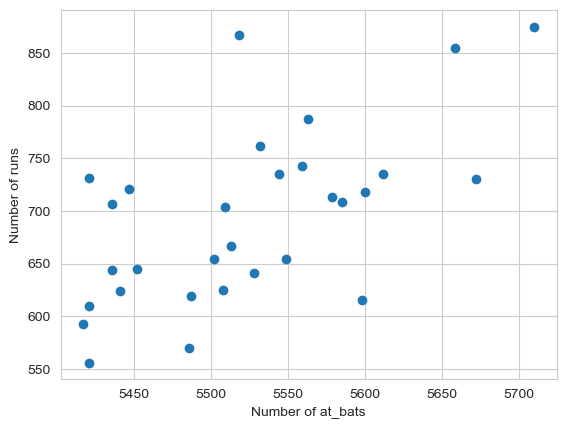

Question 2
Form: Looks like an upoward sloping line with substantial scattering, so not a perfectly straight line.
Direction: It may be positive, as the number of runs increase with the number of bats.
Strength: I don't think the points on the scatterplot show a very strong relationship. But they are not incredibly scattered either. Lets say a light linear relationship
unusual observations: There are a few outliers like the one at around (5525, 860) and in general there are more values for lower number of bats compared to higher numbrt of bats.


In [3]:
# your code/answer here
def print_question(question_number, sep_line_width = 60):
    print(f"Question {question_number}")
    print(sep_line_width * "=")

print_question(1)

print(f"The asociation between runs and at_bats can be shown as x(horizontal axis) is at_bats, y(Vertical axis) is runs")

plt.scatter(baseball["at_bats"], baseball["runs"])
plt.xlabel("Number of at_bats") 
plt.ylabel("Number of runs")  
plt.show()


print_question(2)

print(f"Form: Looks like an upoward sloping line with substantial scattering, so not a perfectly straight line.")
print(f"Direction: It may be positive, as the number of runs increase with the number of bats.")
print(f"Strength: I don't think the points on the scatterplot show a very strong relationship. But they are not incredibly scattered either. Lets say a light linear relationship")
print(f"unusual observations: There are a few outliers like the one at around (5525, 860) and in general there are more values for lower number of bats compared to higher numbrt of bats.")

**Exercise 2** 

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [4]:
baseball['runs'].corr(baseball['at_bats'])

np.float64(0.6106270467206687)

In order to determine the best fit line we can use `statsmodels`, a useful module for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

In [5]:
# the following means: explain variable 'runs' as a function of (some transformation of) variable 'at_bats'
formula_string = "runs ~ at_bats"
# syntax: dependent variable ~ independent variable

# remember OLS = "ordinary least squares" - by far the most commonly used form of linear regression
model = sm.formula.ols(formula = formula_string, data = baseball) # at this point the model is not calculated yet, only defined
model_fitted = model.fit() # this actually runs the regression

# model.fit() containts
    # model_fitted.params -> the estimated coefficients
    # model_fitted.summary() -> a full printed table of fit statistics
    # model_fitted.predict(new_data) -> a method to generate predicted runs for new at_bats values
    # model_fitted.resid -> the raw residuals (observed minus fitted values), usefull for diagnostic plots

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Mon, 19 May 2025   Prob (F-statistic):           0.000339
Time:                        23:04:02   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

1. Based on the output above, write down the equation of the best-fit line.
2. Write down the $R^{2}$ of the model. <div style="text-align: right"> **2 points** </div>

In [6]:
# your code/answer here

print_question(1)
print(f"The table shows Intercept  -2789.2429, this is a point where the straight line intersects the y-axis.")
print(f"And the slope part is 0.6305 for at_bats, like how much runs goes up when at_bats increases")
print(f"Equation for Simple linear regression is y = mx + b")
print(f"The equation of the best-fit line is: runs = 0.6305 * at_bats + (-2789.2429)")

print_question(2)
print(f"R^2 of the model is R-squared: 0.373 according to the above table")

Question 1
The table shows Intercept  -2789.2429, this is a point where the straight line intersects the y-axis.
And the slope part is 0.6305 for at_bats, like how much runs goes up when at_bats increases
Equation for Simple linear regression is y = mx + b
The equation of the best-fit line is: runs = 0.6305 * at_bats + (-2789.2429)
Question 2
R^2 of the model is R-squared: 0.373 according to the above table


### Exercise 3

Plot the association between the two variables again, but this time with the linear model added so there is a visualisation of the model with the data.

1. First, plot the association between the variables, as you did above in Question 1. 
2. Second, use the formula you specified above to compute the predicted number of `runs` ($\hat{y}$) for each value of `at_bats` (${x}$). You can access the intercept and slope of the fitted model by indexing `model_fitted.params`. 
3. Finally, use a lineplot (`sns.lineplot`) to visualize the regression line on top of the first plot. <div style="text-align: right"> **3 points** </div>

Question 1


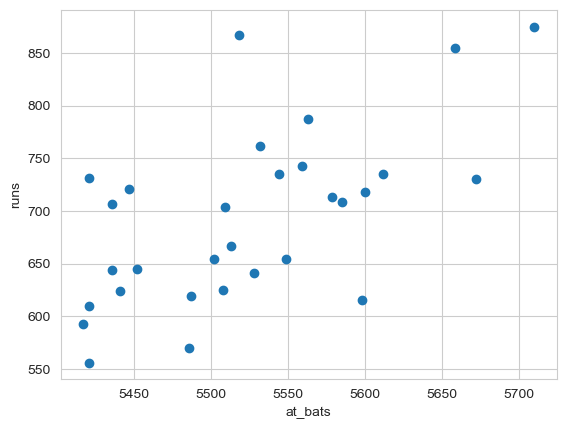

I used scatter plot again since it shows the points clearly.
Question 2
Expected score = slope * List of bat only + intercept
    at_bats  runs  predicted_runs
0      5659   855      779.039524
1      5710   875      811.197574
2      5563   787      718.506725
3      5672   730      787.236674
4      5532   762      698.959675
5      5600   718      741.837074
6      5518   867      690.131975
7      5447   721      645.362926
8      5544   735      706.526275
9      5598   615      740.575974
10     5585   708      732.378825
11     5436   644      638.426876
12     5549   654      709.679025
13     5612   735      749.403674
14     5513   667      686.979225
15     5579   713      728.595525
16     5502   654      680.043175
17     5509   704      684.457025
18     5421   731      628.968626
19     5559   743      715.984525
20     5487   619      670.584925
21     5508   625      683.826475
22     5421   610      628.968626
23     5452   645      648.515676
24     5436   707      6

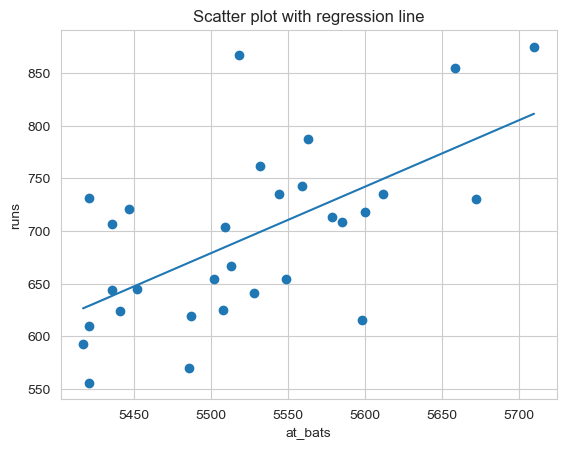

Scatter plots and straight lines were displayed showing a visible relationship between the number of at bats and the number of runs scored.


In [7]:
# your code/answer here
print_question(1)
plt.scatter(baseball["at_bats"], baseball["runs"])
plt.xlabel("at_bats") 
plt.ylabel("runs")  
plt.show()

print(f"I used scatter plot again since it shows the points clearly.")
print_question(2)
slope = model_fitted.params["at_bats"]   
intercept = model_fitted.params["Intercept"]

print(f"Expected score = slope * List of bat only + intercept")
baseball["predicted_runs"] = slope * baseball["at_bats"] + intercept

print(baseball[["at_bats", "runs", "predicted_runs"]])

print(f"")
print_question(3)

plt.scatter(baseball["at_bats"], baseball["runs"])
sns.lineplot(x=baseball["at_bats"], y=baseball["predicted_runs"])

plt.xlabel("at_bats")
plt.ylabel("runs")
plt.title("Scatter plot with regression line")
plt.show() 

print(f"Scatter plots and straight lines were displayed showing a visible relationship between the number of at bats and the number of runs scored.")

### Model diagnostics

To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

Linearity: You already checked if the relationship between `runs` and `at_bats` is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. `at_bats`.

### Exercies 4 

1. To check linearity, plot the residuals against `at_bats`. Remember that the residual scores are defined as $e_{i} = y_{i} - \hat{y}_{i}$ where $e_{i}$ is the residual value, $y_{i}$ is the actual $y$-value, and $\hat{y}_{i}$ is the predicted $y$-value (Hint: use `sns.residplot` for the plotting part).
2. Does the data show a linear trend, or not? Justify your answer. <div style="text-align: right"> **3 points** </div>

Question 1
the residual score


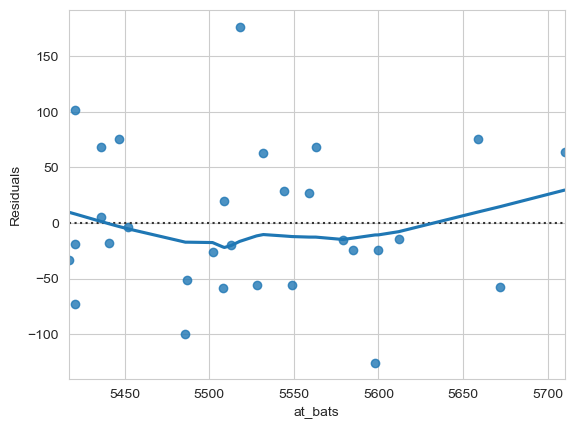

Question 2
The residual plot shows that the points are scattered
The points are scattered up and down and appear to be no particular shape.
And the residual have not become particularly large or small as the number of bats has increased.
So I think the data shows a mostly linear trend.


In [8]:
# your code/answer here
print_question(1)

print(f"the residual score")
baseball["residual"] = baseball["runs"] - baseball["predicted_runs"]

sns.residplot(x=baseball["at_bats"], y=baseball["runs"], lowess=True)
plt.xlabel("at_bats")
plt.ylabel("Residuals")
plt.show()


print_question(2)

print(f"The residual plot shows that the points are scattered")
print(f"The points are scattered up and down and appear to be no particular shape.")
print(f"And the residual have not become particularly large or small as the number of bats has increased.")
print(f"So I think the data shows a mostly linear trend.")

### Exercise 5

Now we will check whether the residuals are *normally distributed*.
1. Plot the residuals in a histogram.
2. Plot the residuals in a QQ-plot (use `probplot` from `scipy.stats` as `probplot(residual_values, plot=plt)`).
3. Are the residuals normally distributed, or not? Explain your answer.<div style="text-align: right"> **4 points** </div>

Question 1


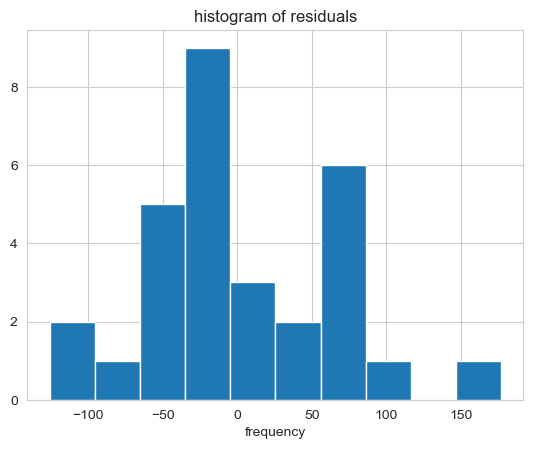

Question 2


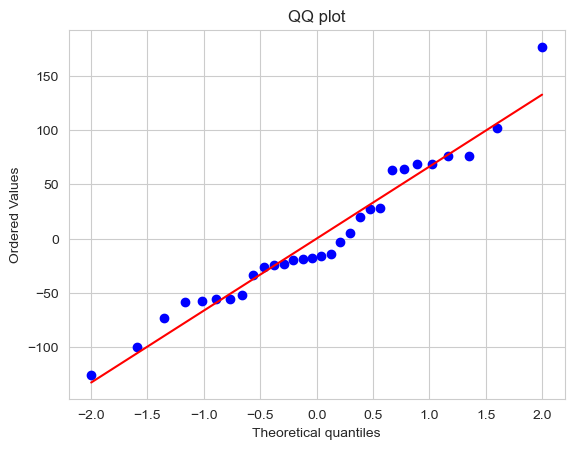

In [9]:
# your code/answer here
print_question(1)
plt.hist(baseball["residual"]) 
plt.xlabel("residuals")
plt.xlabel("frequency")
plt.title("histogram of residuals")
plt.show()


print_question(2)

from scipy import stats
plt.figure()
stats.probplot(baseball["residual"], plot=plt)
plt.title("QQ plot")
plt.show()



In [10]:
# your code/answer here
print_question(3)
print(f"In the histogram, the shape looks uneven. It’s not a perfect bell curve")
print(f"but there’s a big bar in the middle, it looks a little bit normal.")
print(f"Then in the QQ plot, the blue dots go mostly along the red line")
print(f"but near the end point is a little bit off")
print(f"I would say maybe yes, the residuals look almost normally distributed")

Question 3
In the histogram, the shape looks uneven. It’s not a perfect bell curve
but there’s a big bar in the middle, it looks a little bit normal.
Then in the QQ plot, the blue dots go mostly along the red line
but near the end point is a little bit off
I would say maybe yes, the residuals look almost normally distributed


### Exercise 6

Constant variability is the last condition that we will check. Look back at the residual plot of Exercise 4 and determine (qualitatively, by "eye-balling" the plot) if the variability is rougly constant along the whole range of the x-axis. Explain your answer. <div style="text-align: right"> **2 points** </div>

In [11]:
# your code/answer here
print_question(1)
print("Looking at the plot from exercise 4 we can see that the residual scores are")
print("scattered roughly evenly below and above the 0 line for the full range of at_bats,")
print("they have no funnel or megaphone shape.")
print("Therefore the variability seems to be constant across the whole range.")

Question 1
Looking at the plot from exercise 4 we can see that the residual scores are
scattered roughly evenly below and above the 0 line for the full range of at_bats,
they have no funnel or megaphone shape.
Therefore the variability seems to be constant across the whole range.


### Exercise 7

You now have succesfully created a linear model of the data and checked it's validity. There are many more regression techniques for different types of data, but for the next question we will stick with the linear ones.
 
1. Create a linear model for one of the other traditional variables vs runs (hits, homeruns, bat_avg, strikeouts, stolen_bases, or wins). Choose one you think will be a good predictor. Write down the linear formula and the $R^{2}$. Don't forget to create a plot to visualize the association between the two variables.

2. Create a linear model for one of the 3 new variables (new_onbase, new_slug, new_obs) and write down the linear formula and the $R^{2}$ and create a plot to visualize the association between the two variables.
 
3. From the two variables you have chosen above, which variable predicts the `runs` variable the best? Why?

4. Check the model diagnostics for the regression model with the variable you decided was the best predictor for runs. Do these model diagnostics indicate that this linear model is reliable (i.e., check the three assumptions)?<div style="text-align: right"> **10 points** </div>

Question 1
                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.20
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.04e-07
Time:                        23:13:27   Log-Likelihood:                -159.03
No. Observations:                  30   AIC:                             322.1
Df Residuals:                      28   BIC:                             324.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -375.5600    151.181     -2.4

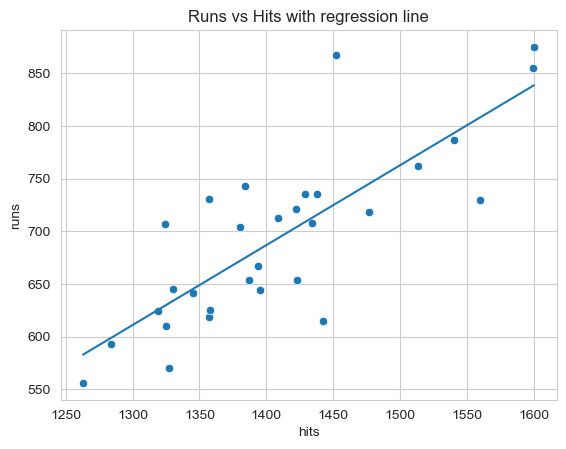

Linear Formula: runs^hat = -375.5600 + 0.7589 * hits
R^2 = 0.642


In [18]:
# your code/answer here
# lets compare with hits
print_question(1)
formula_hits = "runs ~ hits" # adjust the formula
model_hits   = sm.formula.ols(formula=formula_hits, data=baseball)
results_hits = model_hits.fit()
print(results_hits.summary())

# visualizeing
plt.figure()
sns.scatterplot(x=baseball["hits"], y=baseball["runs"])
sns.lineplot   (x=baseball["hits"], y=results_hits.fittedvalues)
plt.xlabel("hits")
plt.ylabel("runs")
plt.title("Runs vs Hits with regression line")
plt.show()

print("Linear Formula: runs^hat = -375.5600 + 0.7589 * hits")
print("R^2 = 0.642")

Question 2
                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     402.3
Date:                Mon, 19 May 2025   Prob (F-statistic):           3.76e-18
Time:                        23:04:02   Log-Likelihood:                -133.45
No. Observations:                  30   AIC:                             270.9
Df Residuals:                      28   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -686.6143     68.925     -9.9

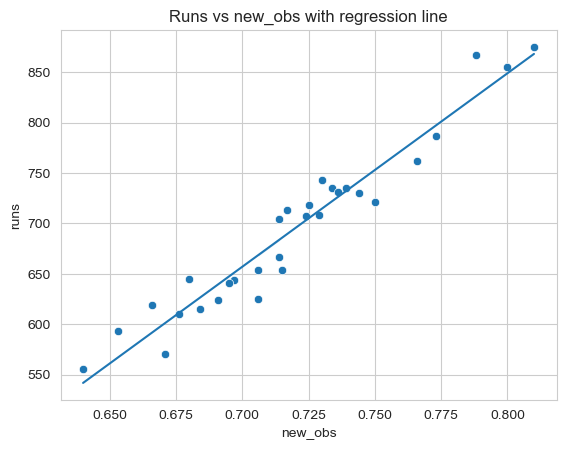

In [13]:
# your code/answer here
# new predictor - new_obs
print_question(2)
formula_obs = "runs ~ new_obs" # new formula
model_obs   = sm.formula.ols(formula=formula_obs, data=baseball)
results_obs = model_obs.fit()
print(results_obs.summary())

# visualizing
plt.figure()
sns.scatterplot(x=baseball["new_obs"], y=baseball["runs"])
sns.lineplot   (x=baseball["new_obs"], y=results_obs.fittedvalues)
plt.xlabel("new_obs")
plt.ylabel("runs")
plt.title("Runs vs new_obs with regression line")
plt.show()

print("Linear Formula: runs^hat = -686.6143 + 1919.3636 * new_obs")
print("R^2 = 0.642")

In [14]:
# your code/answer here
print_question(3)
print("Hits model R^2 = 0.642 < new_obs model R^2 = 0.935")
print("Therefore, new_obs is the better predictor because it has a higher R^2 score")

Question 3
Hits model R^2 = 0.642 < new_obs model R^2 = 0.935
Therefore, new_obs is the better predictor because it has a higher R^2 score


Question 4


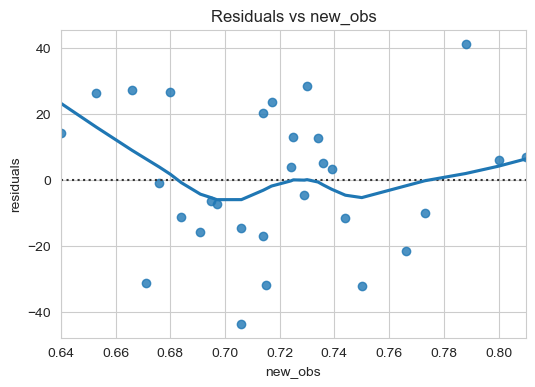

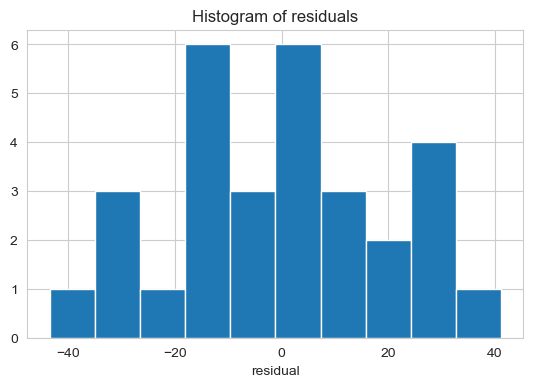

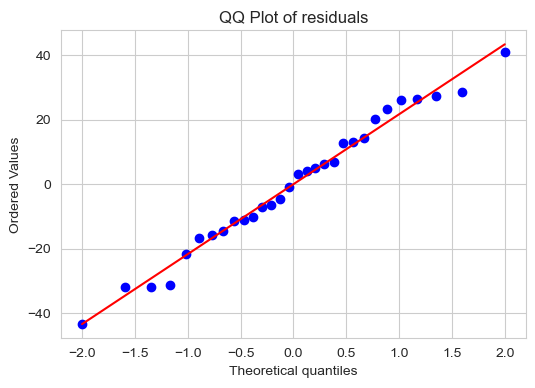

Linearity: Is not met because the lowess line isn't really horizontal and either predicting the residuals to high or too low. -> The isn't really linear.
Constant variance: Is met as the spread is roughly even across new_obs.
Normality: Is met because the histogram is roughly bell shaped and the QQ plot is close to the diagonal.

Therefore, because linearity is violated, this simple linear model isn’t reliable!


In [17]:
# your code/answer here
print_question(4)

# (a) Residuals vs. new_obs (linearity + constant variance)
plt.figure(figsize=(6,4))
sns.residplot(x=baseball["new_obs"],
              y=baseball["runs"],
              lowess=True)
plt.xlabel("new_obs")
plt.ylabel("residuals")
plt.title("Residuals vs new_obs")
plt.show()

# (b) Histogram of residuals (normality)
plt.figure(figsize=(6.4,4))
plt.hist(results_obs.resid, bins=10)
plt.xlabel("residual")
plt.title("Histogram of residuals")
plt.show()

# (c) QQ-plot of residuals (normality)
plt.figure(figsize=(6,4))
stats.probplot(results_obs.resid, plot=plt)
plt.title("QQ Plot of residuals")
plt.show()

print("Linearity: Is not met because the lowess line isn't really horizontal and either predicting the residuals to high or too low. -> The isn't really linear.")
print("Constant variance: Is met as the spread is roughly even across new_obs.")
print("Normality: Is met because the histogram is roughly bell shaped and the QQ plot is close to the diagonal.\n")

print("Therefore, because linearity is violated, this simple linear model isn’t reliable!")

**Total number of points**: 29